### 목표설정
- 손글씨 숫자(0~9)를 분류하는 모델을 만들어보자
- 선형 분류모델의 불확실성을 확인
- 이미지 데이터의 형태를 이해

### 데이터 수집

In [2]:
# 필요한 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:
digit = pd.read_csv('./data/digit_train.csv')
digit.head()

# label은 숫자로 분류가 되고 있음 => 정답 데이터라는 것을 알 수 있다.

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
digit.shape

(42000, 785)

### 데이터 전처리(생략)
- 학습용 데이터라서 이미 깔끔하게 전처리가 되어있음

### 탐색적 데이터 분석(EDA)

In [14]:
# 하나의 데이터를 가져와보자
img0 = digit.iloc[ 0,1:786 ]
img0

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 784, dtype: int64

In [16]:
print(min(img0)) # 최소값 0
print(max(img0)) # 최대값 255


0
255


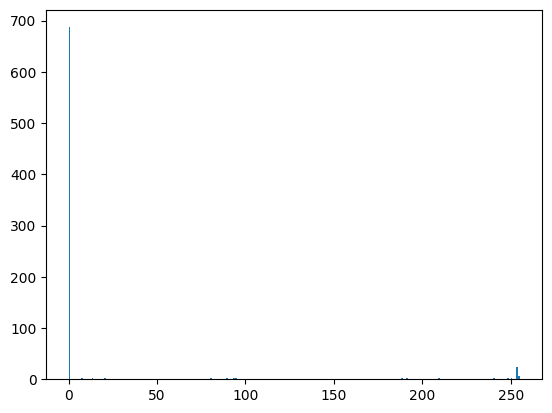

In [21]:
# 히스토그램으로 데이터의 분포를 한번 확인해보자
plt.hist(img0,bins = 255)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

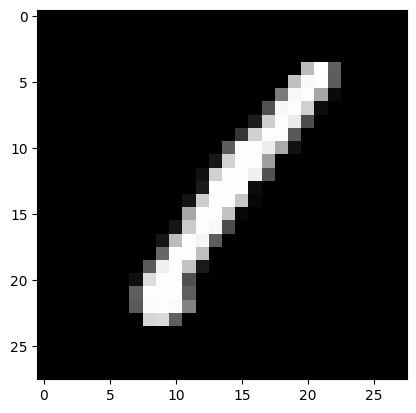

In [25]:
# 실제 데이터 출력해보기
plt.imshow(img0.values.reshape(28,28), cmap = 'gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

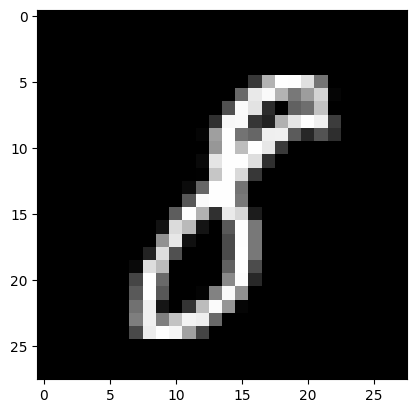

In [29]:
# 하나의 데이터를 가져와보자
img0 = digit.iloc[ 5000,1:786 ]
img0
# 실제 데이터 출력해보기
plt.imshow(img0.values.reshape(28,28), cmap = 'gray')
plt.show

### 데이터 5000장 추출

In [45]:
# 각 데이터 5000개씩 추출
X = digit.iloc[ :5000 , 1: ]
y = digit.iloc[ : 5000, 0]

In [44]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
print(X.shape)
print(y.shape)

(5000, 784)
(5000,)


In [53]:
# train_test_split 이용 데이터 분할(test_size = 30% , random_state = 7)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=7)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3500, 784)
(3500,)
(1500, 784)
(1500,)


### 모델링
- KNN
- Decision Tree
- Logistic Regression
- Random Forest 
  
  사용해볼 예정